# ARTIFICIAL NEURAL NETWORK
**Nava del Río José Antonio**  
**Ojeda Contreras Braulio Melquisdec**  
**Suárez Pérez Juan Pablo**

In [1]:
# Import the libraries needed
import pandas as pd
# Neural network from sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay 
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get data
df = pd.read_csv('./heart.csv', sep = ',', engine = 'python')
X = df.drop(['target'], axis = 1).values
y = df['target'].values

In [3]:
# Generate Data Test and Data Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
# Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes = (150, 100, 50),
                          max_iter = 300, activation = 'relu',
                          solver = 'adam', random_state = 1)

**hidden_layer_sizes:** Number of layers and number of nodes, the length of tuple representes the number of hidden layers, each element represents the number of nodes.  
**max_iter:**  Represents the number of cycles or epochs.  
**activation:** The activation function for the hidden layers.  
**solver:** Specifies the algorithm for weight optimization across the nodes.  

In [5]:
# Fitting the training data to the network
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
results = list()
for i in range(len(y_test)):
    results.append([y_test[i], y_pred[i]])
print(tabulate(results, headers = ['Y Test', 'Y Predict'], tablefmt = 'github'))

|   Y Test |   Y Predict |
|----------|-------------|
|        0 |           0 |
|        1 |           1 |
|        0 |           1 |
|        0 |           1 |
|        1 |           1 |
|        0 |           1 |
|        0 |           0 |
|        0 |           1 |
|        0 |           0 |
|        0 |           0 |
|        1 |           1 |
|        1 |           1 |
|        0 |           0 |
|        1 |           1 |
|        1 |           1 |
|        1 |           1 |
|        1 |           1 |
|        1 |           1 |
|        0 |           0 |
|        1 |           1 |
|        1 |           1 |
|        0 |           1 |
|        0 |           0 |
|        0 |           1 |
|        1 |           1 |
|        0 |           0 |
|        0 |           1 |
|        0 |           1 |
|        1 |           1 |
|        1 |           1 |
|        0 |           1 |
|        0 |           1 |
|        1 |           1 |
|        1 |           1 |
|        1 |           1 |
|

              precision    recall  f1-score   support

           0       0.94      0.34      0.50        44
           1       0.61      0.98      0.75        47

    accuracy                           0.67        91
   macro avg       0.78      0.66      0.63        91
weighted avg       0.77      0.67      0.63        91

[[46  1]
 [29 15]]


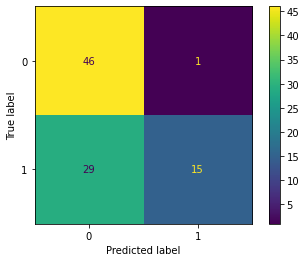

In [8]:
# Report of the model
target_names = list(map(str, [0, 1]))
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()